# Importing libraries for this project

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
import pylab

# Load the Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv')

df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 13)

There are 891 rows and 13 columns

In [5]:
print(list(df.columns))

['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Understand the data using describe function

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brewe, Dr. Arthur Jackson",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


# Check for any missing values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Explore the target variable

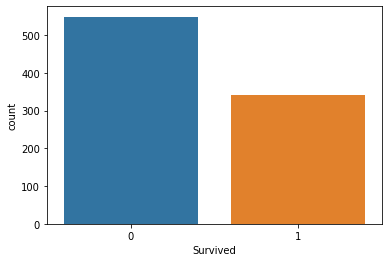

In [20]:
sns.countplot(df['Survived'])

In [21]:
print(df['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


# Visualization of Feature Variables

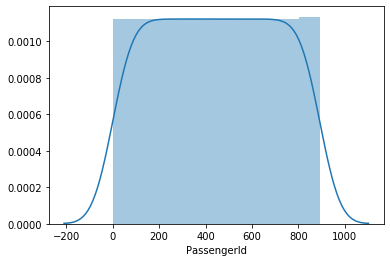

In [22]:
sns.distplot(df['PassengerId'])

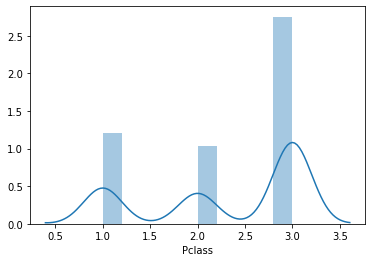

In [23]:
sns.distplot(df['Pclass'])

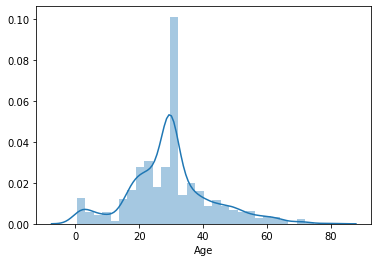

In [24]:
sns.distplot(df['Age'])

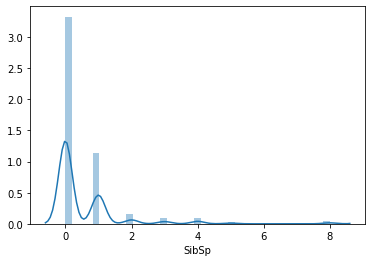

In [25]:
sns.distplot(df['SibSp'])

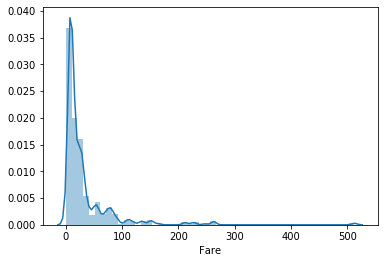

In [26]:
sns.distplot(df['Fare'])

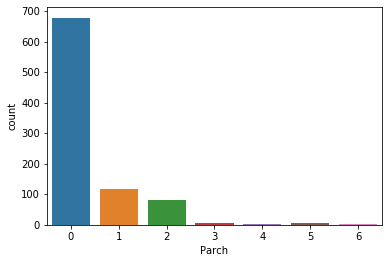

In [27]:
sns.countplot(df['Parch'])

In [28]:
df.drop(['Name'],axis=1,inplace=True)

In [29]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


# Encoding Technique

Dummy Variables

In [30]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

embark = pd.get_dummies(df['Embarked'],drop_first=True)


In [31]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [33]:
df = pd.concat([df,sex,embark],axis=1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,1,0,1


In [35]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'male',
       'Q', 'S'],
      dtype='object')

# Correlation Matrix

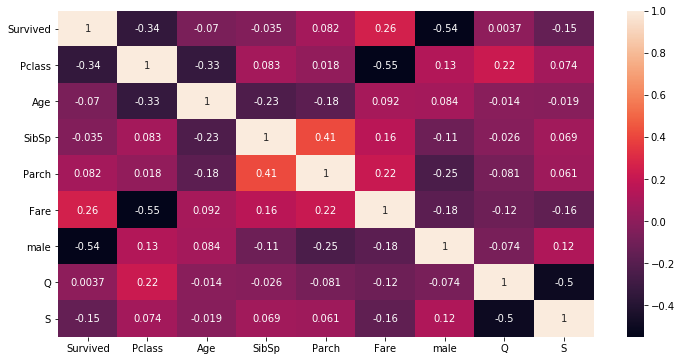

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

# Outliers

 To check for outliers using IQR Approach 

In [38]:
X = df[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]

Y = df['Survived']

In [39]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [40]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
q1 = X.quantile(0.25)

q1

Pclass     2.0000
Age       22.0000
SibSp      0.0000
Parch      0.0000
Fare       7.9104
male       0.0000
Q          0.0000
S          0.0000
Name: 0.25, dtype: float64

In [42]:
q3 = X.quantile(0.75)

q3

Pclass     3.0
Age       35.0
SibSp      1.0
Parch      0.0
Fare      31.0
male       1.0
Q          0.0
S          1.0
Name: 0.75, dtype: float64

In [43]:
iqr = q3 - q1

iqr

Pclass     1.0000
Age       13.0000
SibSp      1.0000
Parch      0.0000
Fare      23.0896
male       1.0000
Q          0.0000
S          1.0000
dtype: float64

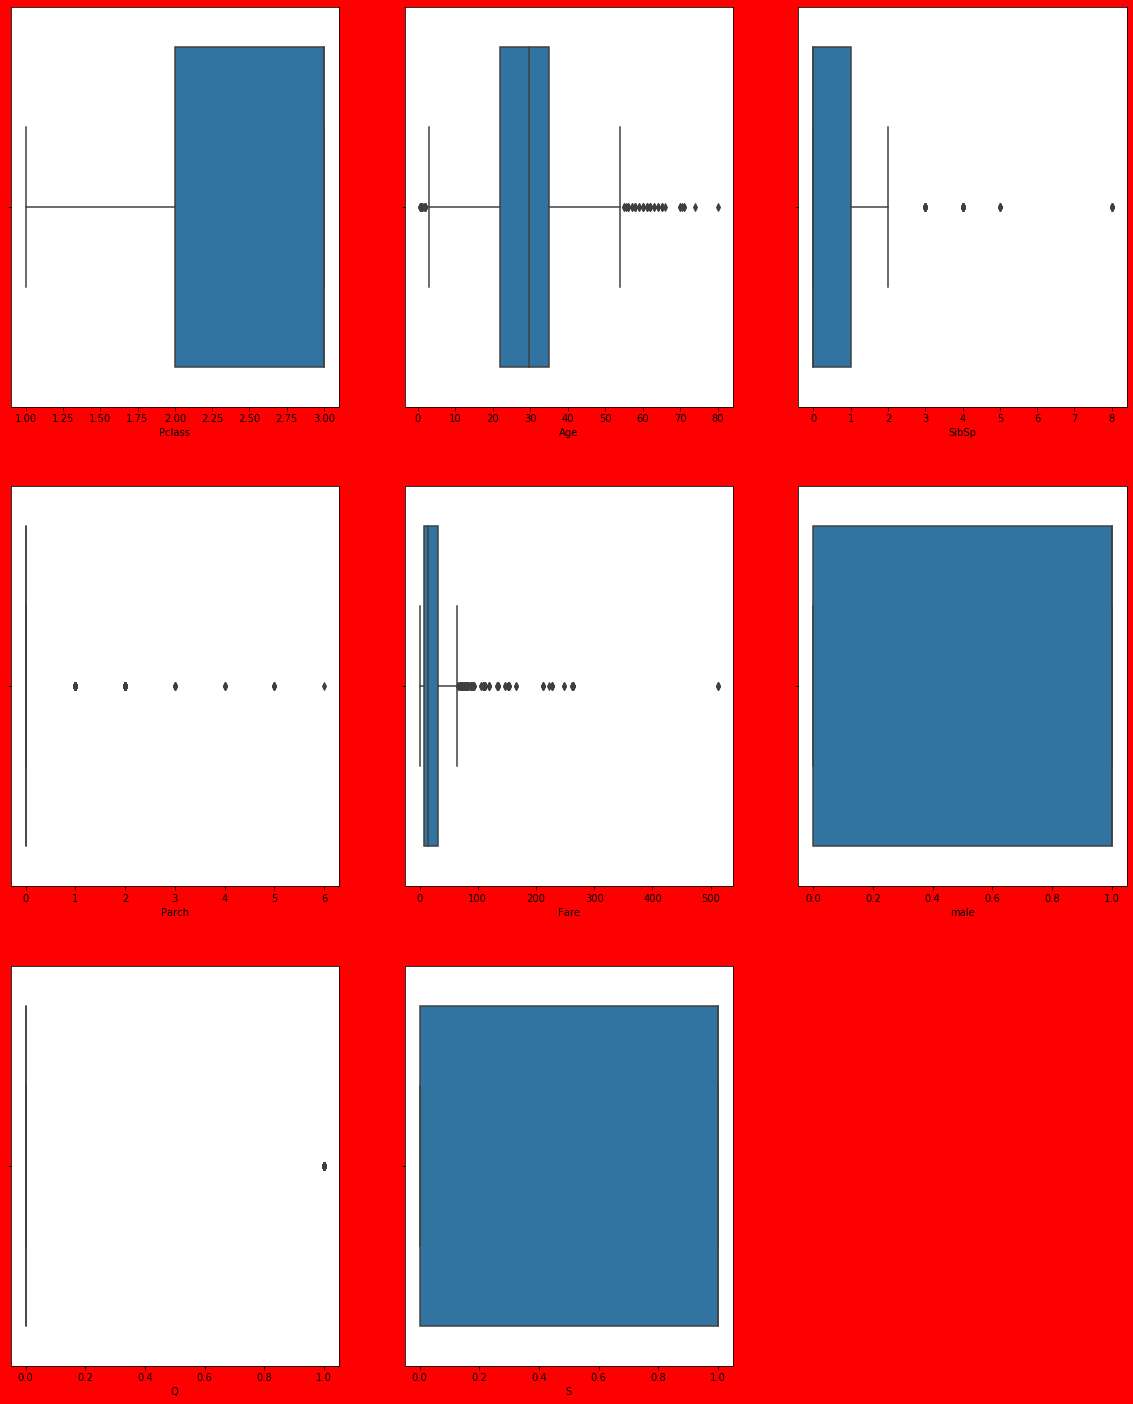

In [45]:
plt.figure(figsize=(20,25),facecolor='red')
pn = 1

for column in X:
    if pn <= 9:
        ax = plt.subplot(3,3,pn)
        sns.boxplot(X[column])
              
    pn +=1
plt.show()

In [ ]:
#Age,#SibSp,#Parch,#Q

In [46]:
age_high = q3['Age'] + (1.5 * iqr['Age'])

age_high

54.5

In [47]:
index = np.where(df['Age'] > age_high)

index

(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
        268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
        555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
        829, 851, 879], dtype=int64),)

In [48]:
df = df.drop(df.index[index])

X.shape

(891, 8)

In [49]:
age_low = q1['Age'] - (1.5 * iqr['Age'])

age_low

2.5

In [50]:
index = np.where(df['Age'] < age_low)

index

(array([  7,  14,  74, 112, 156, 163, 173, 194, 281, 289, 323, 363, 368,
        448, 458, 505, 610, 612, 717, 749, 764, 785, 788, 791], dtype=int64),)

In [51]:
df = df.drop(df.index[index])

X.shape

(891, 8)

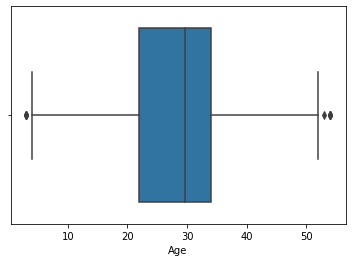

In [52]:
sns.boxplot(df['Age'])

X = Features and Y = Target Variable

In [53]:
X = df[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]

Y = df['Survived']

Stripplot to check for relationship between the target variable

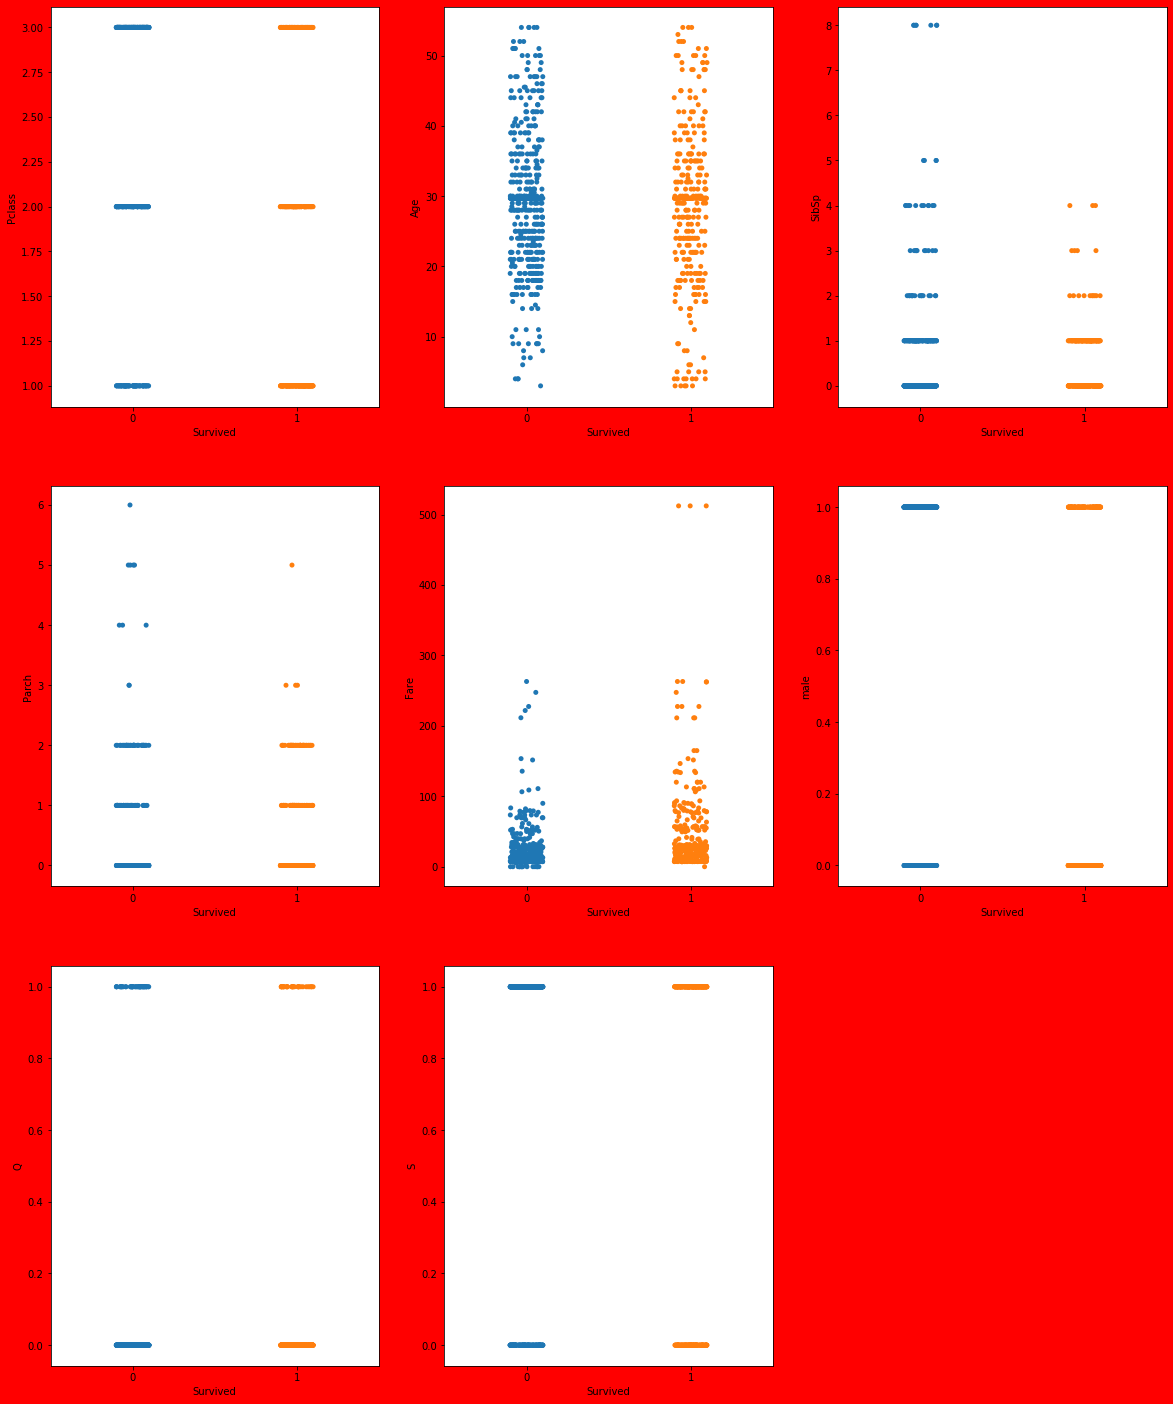

In [54]:
plt.figure(figsize=(20,25),facecolor='red')
pn = 1
for column in X:
        if pn <= 9:
            ax = plt.subplot(3,3,pn)
            sns.stripplot(Y,X[column])

        pn +=1
plt.show()

In [55]:
X.shape

(825, 8)

In [56]:
Y.shape

(825,)

# Scaling the Data using Standard Scaler

In [57]:
scaler = StandardScaler()

X_Scaled = scaler.fit_transform(X)

X_Scaled

array([[ 0.79915529, -0.67603445,  0.4514836 , ...,  0.7440916 ,
        -0.31156776,  0.61237244],
       [-1.62921714,  0.89620965,  0.4514836 , ..., -1.34392055,
        -0.31156776, -1.63299316],
       [ 0.79915529, -0.28297342, -0.46593997, ..., -1.34392055,
        -0.31156776,  0.61237244],
       ...,
       [ 0.79915529,  0.08052132,  0.4514836 , ..., -1.34392055,
        -0.31156776,  0.61237244],
       [-1.62921714, -0.28297342, -0.46593997, ...,  0.7440916 ,
        -0.31156776, -1.63299316],
       [ 0.79915529,  0.30661811, -0.46593997, ...,  0.7440916 ,
         3.20957472, -1.63299316]])

In [58]:
X_Scaled.shape[1]

8

# Checking For Multicollinearity

In [59]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_Scaled,i) for i in range(X_Scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.716527,Pclass
1,1.139626,Age
2,1.262415,SibSp
3,1.320230,Parch
4,1.638317,Fare
5,1.148919,male
6,1.514111,Q
7,1.488153,S


# Modelling

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25)

In [63]:
y_train.shape

(618,)

In [64]:
y_test.shape

(207,)

# LOGISTIC REGRESSION

In [67]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    a=accuracy_score(y_test,y_pred)
    b=confusion_matrix(y_test,y_pred)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  86.47342995169082 found on random state 89


In [68]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=89)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_acc = accuracy_score(y_test,y_pred)*100
print(lr_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

86.47342995169082
[[119  15]
 [ 13  60]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       134
           1       0.80      0.82      0.81        73

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.87      0.86      0.87       207



# DECISION TREE

In [95]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred_1=dt.predict(x_test)
    a=accuracy_score(y_test,y_pred_1)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  84.05797101449275 found on random state 17


In [97]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=17)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_1=dt.predict(x_test)
dt_accu = accuracy_score(y_test,y_pred_1)*100
print(dt_accu)
print(confusion_matrix(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))

82.6086956521739
[[113  18]
 [ 18  58]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       131
           1       0.76      0.76      0.76        76

    accuracy                           0.83       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.83      0.83      0.83       207



# RANDOM FOREST

In [98]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred_2=rf.predict(x_test)
    a=accuracy_score(y_test,y_pred_2)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  88.40579710144928 found on random state 147


In [99]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=147)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu = accuracy_score(y_test,y_pred_2)*100
print(rf_accu)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

87.92270531400966
[[125   4]
 [ 21  57]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       129
           1       0.93      0.73      0.82        78

    accuracy                           0.88       207
   macro avg       0.90      0.85      0.86       207
weighted avg       0.89      0.88      0.88       207



# ROC-AUC SCORE

In [103]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_2)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.03100775 1.        ]
[0.         0.73076923 1.        ]
[2 1 0]


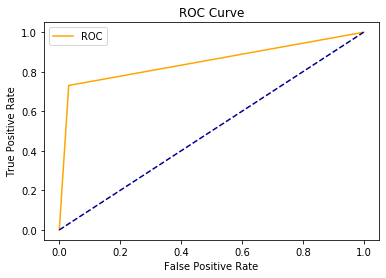

In [104]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [108]:
auc_score = roc_auc_score(y_test,y_pred_2)

auc_score

0.8498807394156231

The roc_auc_score is more for random forest but it is very poor for logistic and decision tree models.

In [109]:
from sklearn.model_selection import cross_val_score

r = cross_val_score(rf,X_Scaled,Y,cv=5)
r.mean()

0.8024242424242424

In [110]:
logis = cross_val_score(lr,X_Scaled,Y,cv=5)
logis.mean()

0.7963636363636364

In [111]:
decis = cross_val_score(dt,X_Scaled,Y,cv=5)
decis.mean()

0.776969696969697

# HyperParameter Tuning for the best model

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = [{
    'max_depth' : [12,14,16],
    'min_samples_split' : [4,8,10],
    'n_estimators' : [50,100,150],
    'criterion' : ['gini','entropy']
}]

In [114]:
clf = GridSearchCV(rf,param_grid=params,cv=10,scoring='accuracy')

clf.fit(x_train,y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [115]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 10,
 'n_estimators': 50}

In [116]:
rf=RandomForestClassifier(max_depth=9,min_samples_split=10,n_estimators=100,criterion='entropy')
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu1 = accuracy_score(y_test,y_pred_2)*100
print(rf_accu)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

87.92270531400966
[[126   3]
 [ 23  55]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       129
           1       0.95      0.71      0.81        78

    accuracy                           0.87       207
   macro avg       0.90      0.84      0.86       207
weighted avg       0.88      0.87      0.87       207



# Save the best model

In [117]:
import pickle

filename = 'Titanic.pkl'

pickle.dump(rf,open(filename,'wb'))